# Diferencias finitas: cálculo numérico de derivadas

En el último notebook, vimos que el método de Newton requiere utilizar la derivada de una función.
En este notebook, veremos una manera (no necesariamente la mejor) de calcular derivadas de funciones de forma numérica: las llamadas **diferencias finitas**.

## Derivadas de funciones uni-dimensionales

#### Ejercicio 1

Considera una función uni-dimensional $f: \mathbb{R} \to \mathbb{R}$, y supón que es suficientemente diferenciable para que las derivadas que tomemos estén definidas [por ejemplo, si $f$ es de clase $C^2$].

(i) Escribe, usando notación LaTeX, la definición de la derivada $f'(a)$ de $f$ en el punto $a$, como límite cuando la variable $h$ tiende a $0$.

Desgraciadamente, **no podemos llevar a cabo el proceso de límite en la computadora**: un límite es algo **continuo**, mientras que la computadora maneja cantidades **discretas**.

$f'(a)=\lim_{h\rightarrow 0} \frac{f(a+h)-f(a)}{h}$

(ii) ¿Cuál solución se te ocurre para esto en términos de la variable $h$? 


hacer un mallado con un tamaño entre malla de distancia h y esa seria un aproximación pues cada vez se puede hacer mas pequeña.

La expresión $f(a+h) - f(a)$ se llama una **diferencia para adelante** ("forward difference"), y cuando lo dividimos por un valor fijo de $h$ se llama un **cociente de diferencias** ("difference quotient"). 

(iii) ¿Geométricamente, a qué corresponde una diferencia de este tipo? ¿Y un cociente de diferencias?

corresponde a tomar 2 puntos como en el ejemplo que di arriba seria de un mallado, donde $f(a+h)=f(h(n+1+a))$ y por otro lado $f(a)=f(h(n+a))$, estamos valuando la funcion en el punto $n+1$ y $n$   y a  esta diferencia la divides entre $h$ que ahora la has hecho finita con una longituda dada, conforme hagas $h$ más pequeña tu aproximacion será mejor.

#### Ejercicio 2

(i) Escribe una función que implemente una diferencia para adelante para una función $f$, punto $a$ y paso $h$ dadas.

In [35]:
using Plots

In [36]:
function forward(f,a,h,n)
 
    m=Int64(n/h)
    der=zeros(m)
    x=zeros(m)
    
    a2=Int64(a)
    x[1]=a2
    for i in 1:m
        der[i]=(f((a2+(i+1))*h)-f((i+a2)*h))/h
        
    end
    for i in 1:m-1
        x[i+1]=x[i]+h
    end
    return x, der
end

forward (generic function with 1 method)

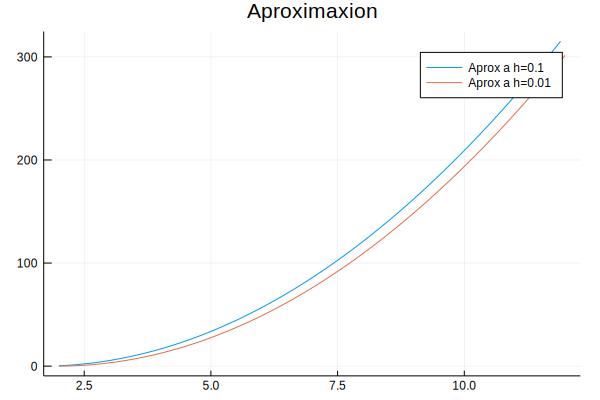

In [37]:
a,b=forward(x->x^3,2,0.1,10)
plot(a,b, title=("Aproximaxion"),label=("Aprox a h=0.1"))
plot!(forward(x->x^3,2,0.01,10), title=("Aproximaxion"),label=("Aprox a h=0.01"))


(ii) Para distintas funciones $f$, grafica la función $f$, su derivada analítica $f'$, y la aproximación a $f'$ utilizando diferencias finitas con distintos pasos $h$.

In [38]:
using SymPy
x=Sym("x")

x

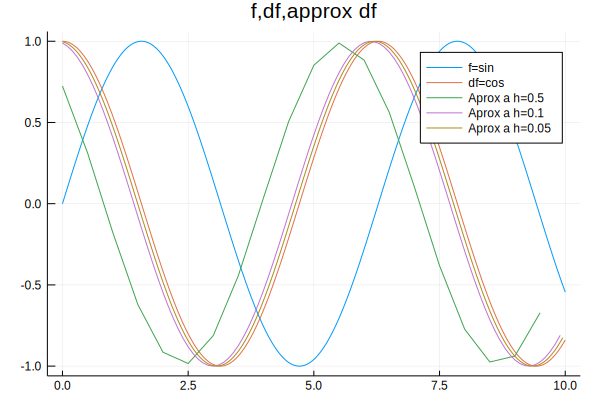

In [39]:
plot(sin(x),0:0.01:10,label=("f=sin"),title=("f,df,approx df"))
plot!(cos(x),0:0.01:10,label=("df=cos"))
plot!(forward(x->sin(x),0,0.5,10),label=("Aprox a h=0.5"))
plot!(forward(x->sin(x),0,0.1,10),label=("Aprox a h=0.1"))
plot!(forward(x->sin(x),0,0.05,10),label=("Aprox a h=0.05"))

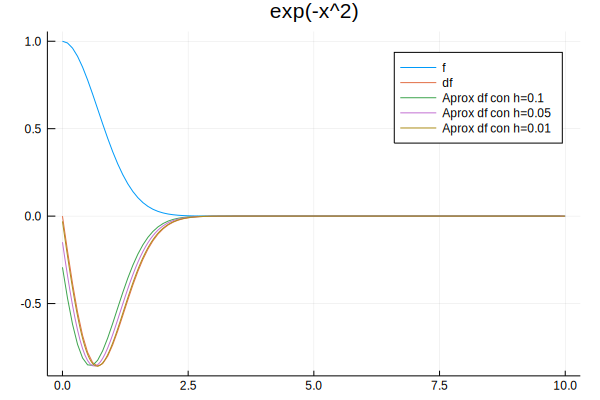

In [40]:

plot(exp(-x^2),0:0.1:10,title=("exp(-x^2)"),label=("f") )
plot!(-2*x*exp(-x^2),0:0.1:10,label=("df"))
plot!(forward(x->exp(-x^2),0,0.1,10),label=("Aprox df con h=0.1"))
plot!(forward(x->exp(-x^2),0,0.05,10),label=("Aprox df con h=0.05"))
plot!(forward(x->exp(-x^2),0,0.01,10),label=("Aprox df con h=0.01"))

(iii) Calcula el error desde el valor analítico que se comete al utilizar la aproximación de la derivada al tomar una $f$ y $a$ dadas, y al variar $h$.
Puedes utilizar la función `logspace` para que los valores de $h$ estén espaciados de forma logarítmica. Hazlo para diferentes funciones y para valores de $h$ tan chicos como $10^{-15}$. (¡Escribe una función que haga el cálculo!) ¿Qué podría causar este efecto?

In [41]:
function dadelante(f,a,h)
    return BigFloat((f(a+h)-f(a))/h)
end
    

dadelante (generic function with 1 method)

In [42]:
function error(f,df,a)
    x=logspace(-15,1,60)
    dis=zeros(length(x))
    for i in 1:length(x)
        dis[i]=norm(df(a)-dadelante(f,a,x[i]))
    end
    return dis
end
    
       
    

error (generic function with 1 method)

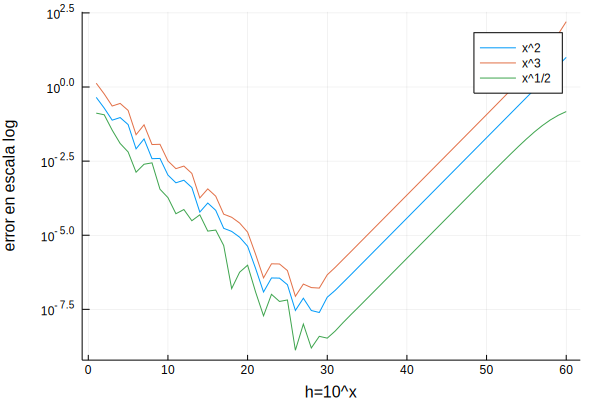

In [43]:
plot(error(x->x^2,x->2*x,2),label=("x^2"),yscale=:log10,ylabel=("error en escala log"), xlabel=("h=10^x"))
plot!(error(x->x^3,x->3*x^2,2),label=("x^3"))
plot!(error(x->x^(1/2),x->0.5*x^(-1/2),2),label=("x^1/2"),)

(iv) ¿Para qué clase de funciones será el resultado exacto? Demuéstralo gráficamente. Así, qué tipo de **aproximación local** de la función estamos usando? 

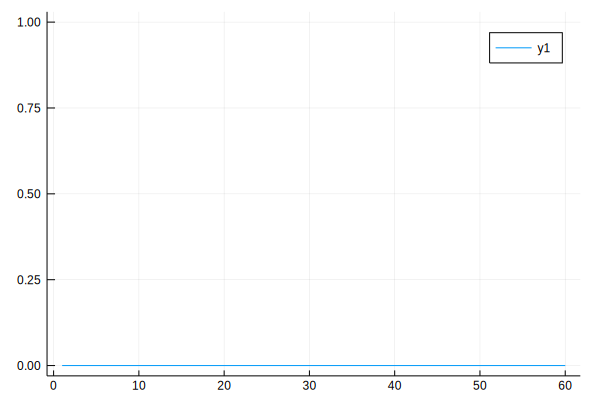

In [44]:
plot(error(x->x,x->1,0))#converge exactamente para funciones de orden 1

#### Ejercicio 3 

(i) Desarrolla $f(a + h)$ en una serie de Taylor con término complementario de Lagrange. Así, rederiva la expresión aproximada que ya obtuviste para la derivada, pero ahora con información *analítica* sobre **el tamaño del error** que cometes cuando utilizas esta aproximación (asintóticamente cuando $h \to 0$). Si el error va como $C.h^n$, con $C$ una constante, entonces escribimos $\mathcal{O}(h^n)$. 

la aproximacion en tayloy de $f(a+h)=f(a)+hf'(a)+\mathcal{O}(h^{2})\rightarrow P_{1}=f(a)+hf'(a)\Rightarrow f(a+h)=P_1(x)+R_k(x)$ donde $R_k$ es el polinomio de la forma del valor medio del resto en la forma de lagrange, este es el termino complementario de lagrange que estará dado por $R_k(x)=\frac{f^{(2)}(\xi_L)}{2!}h^2$ con $a<\xi_L<a+h$ 

la expansion en taylor con complemento de lagrange es: 

$f(a+h)=f(a)+hf'(a)+\frac{f^{(2)}(\xi_L)}{2!}h^2$

(ii) Verifica que coinicide con lo que encontraste numéricamente.

pues si coincide  pues el valor enconttrado trae un error de orden $h^2$ y con el ejercicion de la derivada encontrada arriba vemos que efectivamente coincide numericamente

#### Ejercicio 4

(i) Una mejor aproximación (¿a qué nos referimos con eso?) es la **diferencia centrada**: expande $f(a+h)$ y $f(a - h)$ en series de Taylor separadas. Así, deriva una mejor aproximación a la primera derivada. Calcula su error y chécalo numéricamente.  ¿Para qué tipo de funciones es exacta? 

Tenemos que la aproximacion es $f(a\pm h)=f(a)\pm hf'(a)+\frac{h^2}{2!}f^{(2)}(a)\pm \frac{h^3}{3!}f^{(4)}(x)+\mathcal{O}(h^{4})$ con lo que definimos la diferencia centrada
esta dada por $\delta^0=\frac{1}{2h}(f(a+h)-f(a-h))\approx \frac{1}{2h}[2hf'(a)+\frac{h^3}{3}f^{(3)}(a)+...]=f'(a)+\frac{h^2}{6}f^{(3)}(a)+\mathcal{O}(h^4)$


In [45]:
function dcentrada(f,a,h)
    return BigFloat((f(a+h)-f(a-h))/(2*h))
end

dcentrada (generic function with 1 method)

In [46]:
function errorc(f,df,a)
    x=logspace(-15,1,60)
    dis=zeros(length(x))
    for i in 1:length(x)
        dis[i]=norm(df(a)-dcentrada(f,a,x[i]))
    end
    return dis
end

errorc (generic function with 1 method)

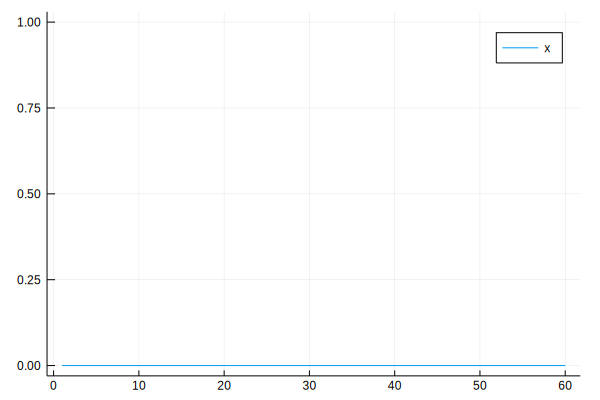

In [47]:
plot(errorc(x->x^2,x->2*x,0),label=("x"))#converge extactamente para ecuaciones de orden 2

(ii) Encuentra una aproximación para la segunda derivada y encuentra su error; chécalo numéricamente. 

la segunda derivada esta dada por $f''(a)= \frac{\frac{f(a+h)-f(a)}{h}-\frac{f(a)-f(a-h)}{h}}{h}+\mathcal{O}(h^2)=\frac{f(a+h)-2f(a)+f(a-h)}{h^2}+\mathcal{O}(h^2)$

In [48]:
function dsecn(f,a,h)
    return (f(a+h)-2*f(a)+f(a-h))/(h*h)
end

dsecn (generic function with 1 method)

In [49]:
function errorsd(f,df,a)
    x=logspace(-10,-1,50)
    dis=zeros(length(x))
    for i in 1:length(x)
        dis[i]=norm(df(a)-dsecn(f,a,x[i]))
    end
    return dis
end

errorsd (generic function with 1 method)

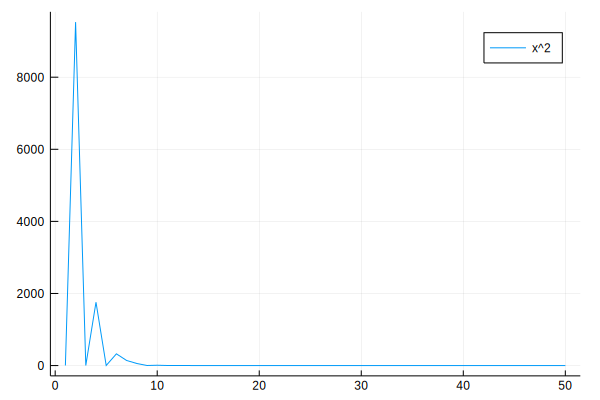

In [50]:
plot(errorsd(x->x^2,x->2*x,1),label=("x^2"))

## Funciones multi-dimensionales 

Ahora consideremos una función $f: \mathbb{R}^2 \to \mathbb{R}$ y $g: \mathbb{R}^2 \to \mathbb{R}^2$.

#### Ejercicio 5

(i) ¿Qué tipo de derivadas quisiéramos poder calcular para $f$ y $g$? ¿Cómo podemos utilizar lo que ya hicimos para funciones uni-dimensionales para aplicarlo directamente a $f$ y $g$?

para $f$ definimos la derivada direccional en direccion $x$ y la direccion $y$ como $\frac{\partial f}{\partial x}\approx \frac{f[a+h][b]-f[a][b]}{h}$ y en la direccion y como $\frac{\partial f}{\partial y}\approx \frac{f[a][b+h]-f[a][b]}{h}$.Así que se puede utilizar el método para funciones uni-dimensionales.

Ahora para $g:\Re^2\rightarrow \Re^2$ como $g(x,y)=(g_x,g_y)\rightarrow Dg=\begin{bmatrix}
    \partial_x(g_x) & \partial_y(g_x)  \\
   \partial_x(g_y)& \partial_y(g_y)
    \end{bmatrix}$

(ii) Impleméntalo y compara con funciones cuyas derivadas conoces analíticamente.

In [51]:

function r2tor(f,a,b,h)
   dx= (f(a+h,b)-f(a,b))/(h)
    dy=(f(a,b+h)-f(a,b))/(h)
    return dx,dy
end

r2tor (generic function with 1 method)

In [52]:
h(x,y)=x^2+y
r2tor(h,2,2,0.001)#si coincide con el valor de la expresion analitica que ya conozco

(4.000999999999699, 0.9999999999994458)

In [53]:

function r2tor2(f,a,b,h)
    D=zeros(2,2)
   
   D[1,1]= (f(a+h,b)[1]-f(a,b))[1]/(h)
   D[1,2]= (f(a,b+h)[1]-f(a,b)[1])/(h)
   D[2,1]= (f(a+h,b)[2]-f(a,b))[2]/(h)
   D[2,2]= (f(a,b+h)[2]-f(a,b)[2])/(h) 
   
    return D
end

r2tor2 (generic function with 1 method)

In [54]:
g(x,y)=[x^2+y^2,x]
r2tor2(g,1,1,0.01)
#vemos que si coincide con el valor de la expresion analitica queya es bien conocida

2×2 Array{Float64,2}:
 2.01  2.01
 1.0   0.0 

## De regreso al método de Newton

#### Ejercicio 6

Utiliza una diferencia finita, con una $h$ pequeña, para aproximar la derivada en el método de Newton. ¿Cómo afecta el utilizar una aproximación de la derivada, en lugar del valor exacto, en la tasa de convergencia? Compara los resultados al utilizar los dos tipos de diferencias finitas (para adelante y centrada).

In [55]:
function newton(f,df,x0,h)
    d=1
    err=0.00001
    iter=[]
    itera=[]
    iterc=[]
    x01=x0
    x02=x0
    while err<d 
        x = x0 - f(x0)/df(x0)
        d= norm(x-x0)
        x1 = x01 - f(x01)/dcentrada(f,x0,h)
        x2 = x02 - f(x02)/dadelante(f,x0,h)
        push!(itera,x2)
        push!(iterc,x1)
        push!(iter,x)
    
        x0=x
        x01=x1
        x02=x2
    end
    return iter, itera,iterc
        
end


newton (generic function with 1 method)

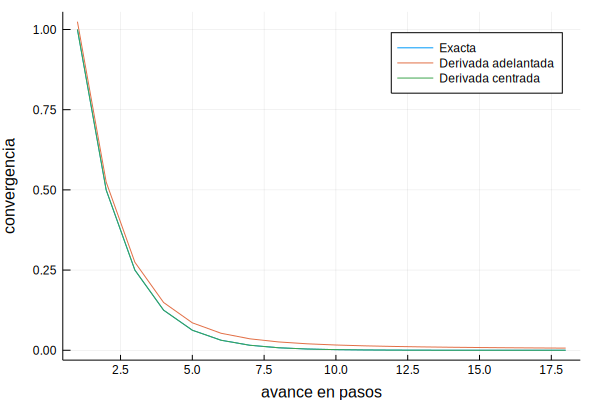

In [56]:
a,b,c=newton(x->x^2,x->2*x,2,0.1)
plot(a,label=("Exacta"),ylabel=("convergencia"),xlabel=("avance en pasos"))
plot!(b,label=("Derivada adelantada"))
plot!(c,label=("Derivada centrada"))


## Diferencias finitas con pasos complejos



Una alternativa interesante es el utilizar la fórmula

$$f'(a) \simeq \frac{\mathrm{Im}[f(a + ih)]}{h},$$

donde $i=\sqrt{-1}$ y utilizamos evaluaciones complejas de la función real $f$; $\mathrm{Im}$ denota la parte imaginaria.

#### Ejercicio 7

(i) Implementa esto y verifica que puedes utilizar valores de $h$ ridículamente pequeñas.

(ii) Encuentra el tamaño del error numérico en función de $h$.

(iii) Utiliza un desarrollo de Taylor para encontrar el tamaño del error.

In [57]:
function derim(f,a,h)
    return imag(f(a+im*h)/h)   
end

derim (generic function with 1 method)

In [58]:
derim(x->x^2,2,exp(-500))#aqui podemos ver que podemos escoger h ridiculamente pequeñas
#como exp(-500) y el no hay problema

4.0

In [59]:
function errorimaginario(f,df,a)
    x=logspace(-50,0,50)
    dif=zeros(length(x))
    for i in 1:length(x)
        dif[i]=norm(df(a)-derim(f,a,x[i]))
    end
    return dif
end
        

errorimaginario (generic function with 1 method)

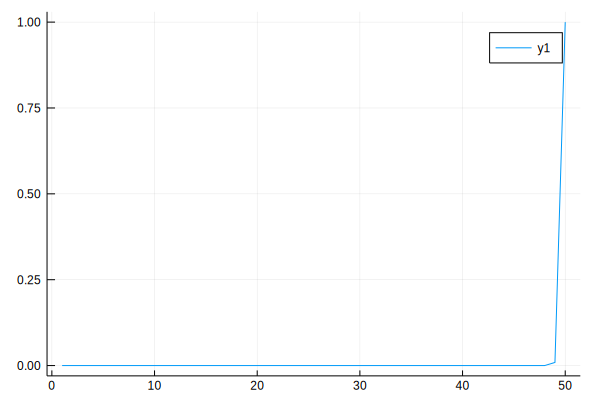

In [60]:
plot(errorimaginario(x->x^3,x->3*x^2,8))

tenemos que la aproximacion en taylor va como $f(a+ih)=f(a)+ihf'(a)-h^2\frac{f''(a)}{2!}-ih^3\frac{f'''(a)}{3!}+...$ y tomando la parte imaginaria de esta serie de taylor y dividiendo por $h$ tenemos que $f'(a)=\frac{[Im(f(a+ih)]}{h}+h^2\frac{f'''(a)}{3!}+...$
con lo que podemos aproximar a $f'(a)\approx \frac{[Im(f(a+ih)]}{h}+\mathcal{O}(h^2)$ con lo que podemos concluir que el tamaño del error es $\mathcal{O}(h^2)$